## Format WoFS WRFOUTs into GraphCast-Friendly Format 

This notebook reads the raw WoFS WRFOUT files and formats them in xarray dataset formatted
for the GraphCast code.


In [1]:
import sys, os 
sys.path.insert(0, os.path.dirname(os.path.dirname(os.getcwd())))


import xarray as xr
import pandas as pd
import numpy as np 

from glob import glob
import os

from datetime import datetime, timedelta
import itertools

from wofscast.utils import run_parallel, to_iterator 

from wrfout_file_formatter import FileFormatter, filter_dates 

In [2]:
formatter = FileFormatter(n_jobs= 10, 
                          duration_minutes=20, 
                          timestep_minutes=10, 
                          offset=60, 
                          domain_size=150, 
                          out_path = '/work/mflora/wofs-cast-data/datasets', 
                          debug=True)

# Only sample from top of the hour to potential sample 6 hrs of forecast. 
# Not sampling earlier in the data due to WoFS data quality.
init_times = ['1900', '1930', 
              '2000', '2030', 
              '2100', '2130', 
              '2200', '2230', 
              '2300', '2330',
              '0000', '0030',
              '0100', '0130',
              '0200', '0230',
              '0300']

# # wrfwof_2021-06-03_223000_to_2021-06-04_003000__10min__ens_mem_09.nc'


# Subsample ensemble members to increase diversity in sample.
mems = np.arange(1, 19)

init_times = ['2230']
mems = [9]

file_paths_set = [] 
all_dates = [] 
years = ['2019']#, '2020', '2021']
for year in years: 
    base_path = os.path.join('/work2/wof/realtime/FCST/', year)
    possible_dates = os.listdir(base_path)
    
    good_dates = filter_dates(possible_dates)
    
    all_dates.extend(good_dates)
    
    all_file_paths = list(formatter.gen_file_paths(base_path, good_dates, init_times, mems))  
    
    file_paths_set.extend(all_file_paths)
    
    
total_files = len(all_dates)*len(mems)*len(init_times)               
print(f"Num of Samples: {total_files}")

ds = formatter.run([file_paths_set[25]])

/work2/wof/realtime/FCST/2019/20190622/2230/ENS_MEM_9/wrfwof_d01_*
/work2/wof/realtime/FCST/2019/20190621/2230/ENS_MEM_9/wrfwof_d01_*
/work2/wof/realtime/FCST/2019/20190626/2230/ENS_MEM_9/wrfwof_d01_*
/work2/wof/realtime/FCST/2019/20190623/2230/ENS_MEM_9/wrfwof_d01_*
/work2/wof/realtime/FCST/2019/20190627/2230/ENS_MEM_9/wrfwof_d01_*
/work2/wof/realtime/FCST/2019/20190429/2230/ENS_MEM_9/wrfwof_d01_*
/work2/wof/realtime/FCST/2019/20190620/2230/ENS_MEM_9/wrfwof_d01_*
/work2/wof/realtime/FCST/2019/20190618/2230/ENS_MEM_9/wrfwof_d01_*
Num of Samples: 33
Loading lat, lon, and variables to drop...
Processed result for /work/mflora/wofs-cast-data/datasets/2019/wrfwof_2019-05-24_233000_to_2019-05-24_235000__10min__ens_mem_09.nc


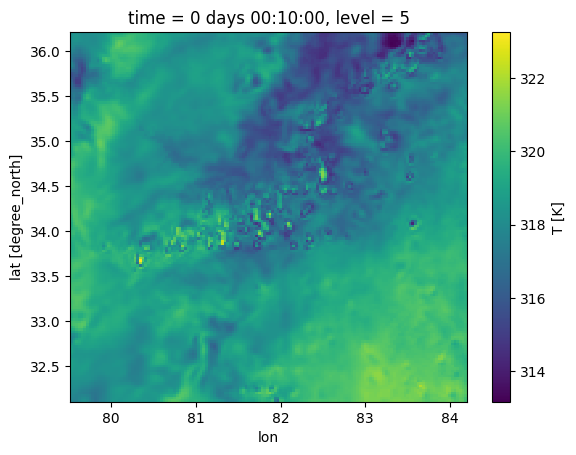

In [5]:
ds['T'].isel(time=1, level=5).plot()